<a href="https://colab.research.google.com/github/nannaphatsirison/Energy-Systems-Modeling/blob/main/SEREVI_(working_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETTING UP THE WORKSPACE WITH RELEVANT PACKAGES

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install geopy
! pip install geopandas
! pip install plotly-express
! pip install tqdm

     |████████████████████████████████| 1.0 MB 13.5 MB/s 
     |████████████████████████████████| 16.7 MB 45.7 MB/s 
     |████████████████████████████████| 6.3 MB 49.1 MB/s 


In [69]:
import pandas as pd
import geopandas as gpd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px

import descartes
from shapely.geometry import Point
%matplotlib inline

In [4]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks/SEREVI')

# STEP 1: LOAD COUNTY POPULATION DATA FROM US CENSUS 2020 

The database contains all data from the 7 states in the Southeast Region

In [5]:
county_population = pd.read_csv('nhgis0001_ds248_2020_county.csv',encoding='latin-1')
county_population.head()

,GISJOIN,YEAR,GEOID,GEOCODE,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,COUSUBCC,SUBMCDA,CONCITA,PLACEA,PLACECC,TRACTA,BLKGRPA,BLOCKA,AIANHHA,RES_ONLYA,TRUSTA,AIANHHCC,AITSA,ANRCA,CBSAA,MEMI,CSAA,METDIVA,NECTAA,NMEMI,CNECTAA,NECTADIVA,CBSAPCI,NECTAPCI,CDA,SLDU18A,SLDL18A,VTDA,VTDI,...,U7B032,U7B033,U7B034,U7B035,U7B036,U7B037,U7B038,U7B039,U7B040,U7B041,U7B042,U7B043,U7B044,U7B045,U7B046,U7B047,U7B048,U7B049,U7B050,U7B051,U7B052,U7B053,U7B054,U7B055,U7B056,U7B057,U7B058,U7B059,U7B060,U7B061,U7B062,U7B063,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071
0,G0100010,2020,0500000US01001,1001,3,6,Alabama,1,Autauga County,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33860,1,388,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,32,13,5,0,8,0,6,0,0,0,0,0,0,0,8,2,4,0,0,0,0,0,1,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,0
1,G0100030,2020,0500000US01003,1003,3,6,Alabama,1,Baldwin County,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19300,1,380,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17,126,48,30,0,0,0,0,1,3,0,0,0,0,2,38,18,1,14,0,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,G0100050,2020,0500000US01005,1005,3,6,Alabama,1,Barbour County,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21640,2,999,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0
3,G0100070,2020,0500000US01007,1007,3,6,Alabama,1,Bibb County,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13820,1,142,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,10,0,4,0,0,0,7,0,0,0,0,0,0,0,10,0,1,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,G0100090,2020,0500000US01009,1009,3,6,Alabama,1,Blount County,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13820,1,142,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,44,0,1,1,1,0,0,0,0,0,0,0,0,0,22,14,0,5,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [114]:
#Filter to look at only data from each state state
NC_county= county_population[county_population['STATE']== "North Carolina"]
FL_county= county_population[county_population['STATE']== "Florida"]
AL_county= county_population[county_population['STATE']== "Alabama"]
TN_county= county_population[county_population['STATE']== "Tennessee"]
SC_county= county_population[county_population['STATE']== "South Carolina"]
GA_county= county_population[county_population['STATE']== "Georgia"]
MS_county= county_population[county_population['STATE']== "Mississippi"]


# STEP 2: GET SHAPE FILES FROM US CENSUS 2020 

In [6]:
#Getting shape files for counties 
US_shape = gpd.read_file('US_county_2020.shp')

# STEP 3: JOIN/ MERGE POPULATION DATA WITH SHAPE FILES 

In [123]:
NC_county_map = US_shape.merge(NC_county, how='inner',  on='GISJOIN', validate='one_to_one')
FL_county_map = US_shape.merge(FL_county, how='inner',  on='GISJOIN', validate='one_to_one')
AL_county_map = US_shape.merge(AL_county, how='inner',  on='GISJOIN', validate='one_to_one')
TN_county_map = US_shape.merge(TN_county, how='inner',  on='GISJOIN', validate='one_to_one')
SC_county_map = US_shape.merge(SC_county, how='inner',  on='GISJOIN', validate='one_to_one')
GA_county_map = US_shape.merge(GA_county, how='inner',  on='GISJOIN', validate='one_to_one')
MS_county_map = US_shape.merge(MS_county, how='inner',  on='GISJOIN', validate='one_to_one')

# STEP 4: PLOT COUNTY SHAPE FILES IN ORDER TO GET OUTLINE AND CHECK DATA

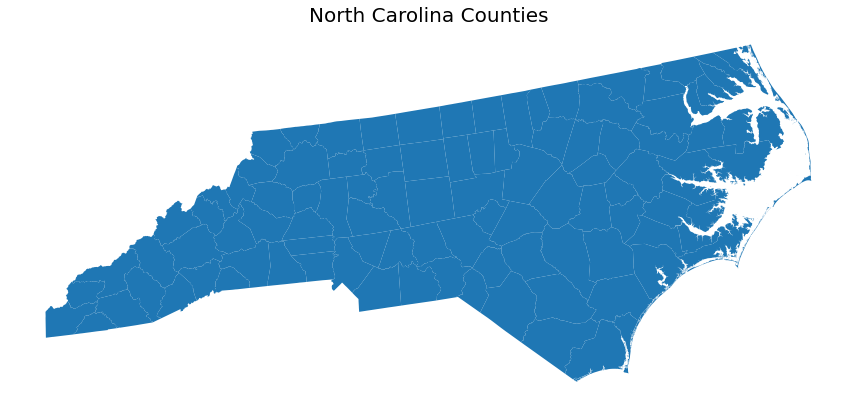

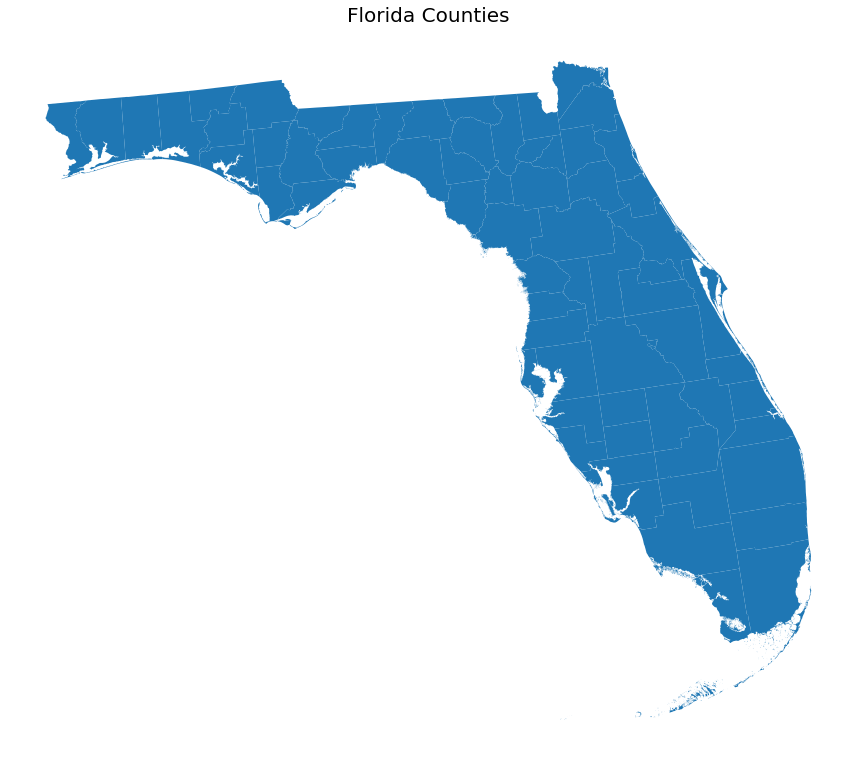

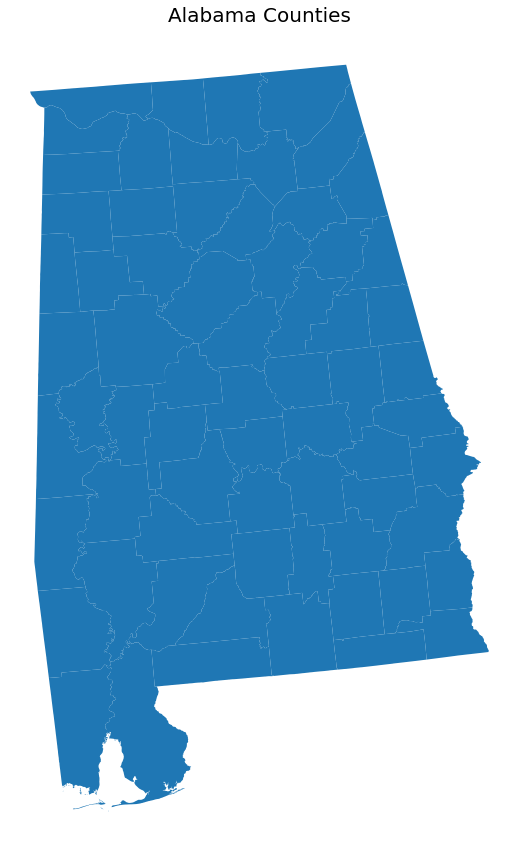

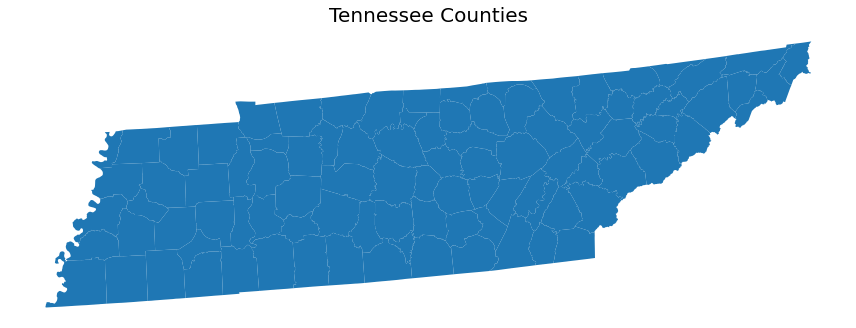

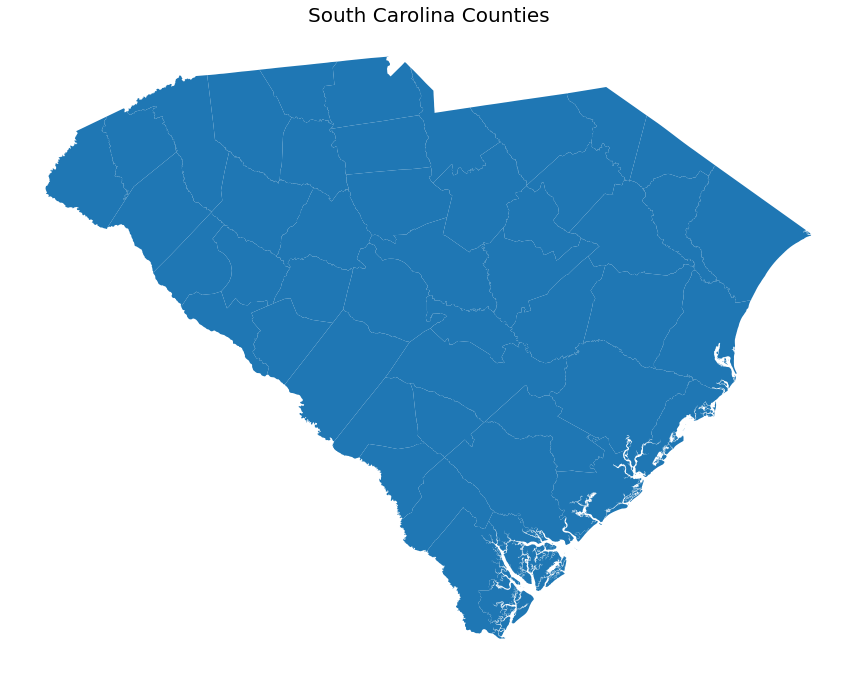

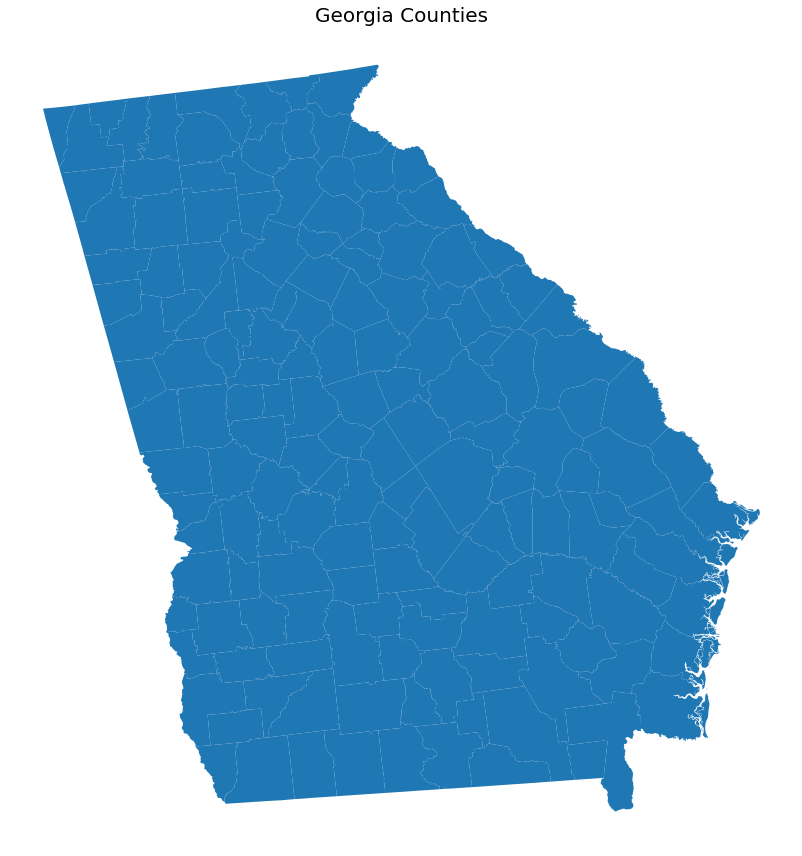

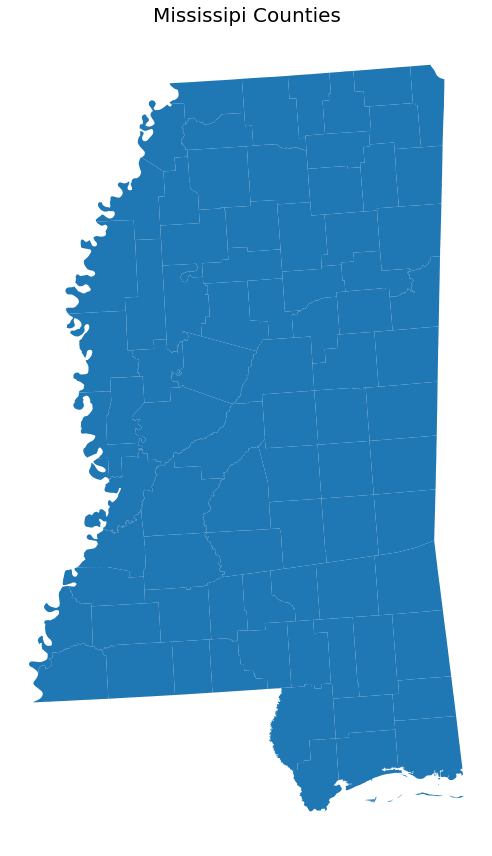

In [125]:
fig, ax = plt.subplots(figsize=(12,12))
NC_county_map.plot(ax=ax)
ax.set_title('North Carolina Counties', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(12,12))
FL_county_map.plot(ax=ax)
ax.set_title('Florida Counties', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(12,12))
AL_county_map.plot(ax=ax)
ax.set_title('Alabama Counties', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(12,12))
TN_county_map.plot(ax=ax)
ax.set_title('Tennessee Counties', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(12,12))
SC_county_map.plot(ax=ax)
ax.set_title('South Carolina Counties', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(12,12))
GA_county_map.plot(ax=ax)
ax.set_title('Georgia Counties', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(12,12))
MS_county_map.plot(ax=ax)
ax.set_title('Mississipi Counties', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

In [126]:
# This code chunk just determine the mapping projection 
# CRS stands for coordinate reference system 
# EPSG 4296 is the one that is suitable for North America and Canada 

NC_county_map = NC_county_map.to_crs("EPSG:4269")
FL_county_map = NC_county_map.to_crs("EPSG:4269")
AL_county_map = NC_county_map.to_crs("EPSG:4269")
TN_county_map = NC_county_map.to_crs("EPSG:4269")
SC_county_map = NC_county_map.to_crs("EPSG:4269")
GA_county_map = NC_county_map.to_crs("EPSG:4269")
MS_county_map = NC_county_map.to_crs("EPSG:4269")

In [133]:
NC_outline = NC_county_map.dissolve(by=NC_county_map.columns[0], 
                                       aggfunc='first')
FL_outline = NC_county_map.dissolve(by=FL_county_map.columns[0], 
                                       aggfunc='first')
AL_outline = NC_county_map.dissolve(by=AL_county_map.columns[0], 
                                       aggfunc='first')
TN_outline = NC_county_map.dissolve(by=TN_county_map.columns[0], 
                                       aggfunc='first')
SC_outline = NC_county_map.dissolve(by=SC_county_map.columns[0], 
                                       aggfunc='first')
GA_outline = NC_county_map.dissolve(by=GA_county_map.columns[0], 
                                       aggfunc='first')
MS_outline = NC_county_map.dissolve(by=MS_county_map.columns[0], 
                                       aggfunc='first')
 

# STEP 5: Upload EV Charger Data 

Convert Latitude and Longitude Data into points for mapping

In [ ]:
EV_charger =pd.read_excel("EV_charger_2.xlsx",keep_default_na=False)
EV_charger.head()

In [102]:
EV_charger.dtypes

Latitude              object
Longitude             object
EV Level1 EVSE Num    object
EV Level2 EVSE Num    object
EV DC Fast Count      object
ZIP                   object
dtype: object

In [104]:
EV_charger["Longitude"] = pd.to_numeric(EV_charger["Longitude"])
EV_charger["Latitude"] = pd.to_numeric(EV_charger["Latitude"])
EV_charger.head()

,Latitude,Longitude,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,ZIP
0,35.860856,-78.594330,,,,27616
1,35.725470,-78.647141,,,,27529
2,35.579606,-82.518150,,,,28805
3,35.251751,-81.094666,,,,28056
4,35.588154,-82.550896,,,,28801


In [106]:
geometry = [Point(xy) for xy in zip(EV_charger["Longitude"],EV_charger["Latitude"])]
geometry[:3]

In [105]:
crs = {'init':"EPSG:4269"}

In [107]:
EV_charger_coordinates = gpd.GeoDataFrame(EV_charger, crs= crs, geometry = geometry)
EV_charger_coordinates.head(3)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,Latitude,Longitude,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,ZIP,geometry
0,35.860856,-78.594330,,,,27616,POINT (-78.59433 35.86086)
1,35.725470,-78.647141,,,,27529,POINT (-78.64714 35.72547)
2,35.579606,-82.518150,,,,28805,POINT (-82.51815 35.57961)


In [111]:
EV_charger_points = EV_charger_coordinates['geometry']

# STEP 6: USE THE 2020 CENUS POPULATION TO EXAMINE DIFFERENT POPULATION PARAMETERS (RACE)

Depending on what we want to map we need to create a new column for the metric, of interesting using basic algebraic functions. For example, instead of mapping absolute population numbers by race, to look at the rate of population by race we create a new column that divides the total population of people identifying as white by total population in each county. 

The important indices defined by the Metadata (US CENSUS 2020) relevant for our analysis are as follows: 

1. U7B001:      Total
2. U7B002:      Population of one race
3. U7B003:      Population of one race: White alone
4. U7B004:      Population of one race: Black or African American alone
5. U7B005:      Population of one race: American Indian and Alaska Native alone
6. U7B006:      Population of one race: Asian alone
7. U7B007:      Population of one race: Native Hawaiian and Other Pacific Islander alone
8. U7B008:      Population of one race: Some Other Race alone
9. U7B009:      Population of two or more races
10. U7B010:      Population of two or more races: Population of two races
11. U7B011:      Population of two or more races: Population of two races: White; Black or African 



In [128]:
NC_county_map['white_rate']=NC_county_map['U7B003']/NC_county_map['U7B001']
FL_county_map['white_rate']=FL_county_map['U7B003']/FL_county_map['U7B001']
AL_county_map['white_rate']=AL_county_map['U7B003']/AL_county_map['U7B001']
TN_county_map['white_rate']=TN_county_map['U7B003']/TN_county_map['U7B001']
SC_county_map['white_rate']=SC_county_map['U7B003']/SC_county_map['U7B001']
GA_county_map['white_rate']=GA_county_map['U7B003']/GA_county_map['U7B001']
MS_county_map['white_rate']=MS_county_map['U7B003']/MS_county_map['U7B001']

# STEP 7: RESULTS (PLOTS OF NORTH CAROLINA)

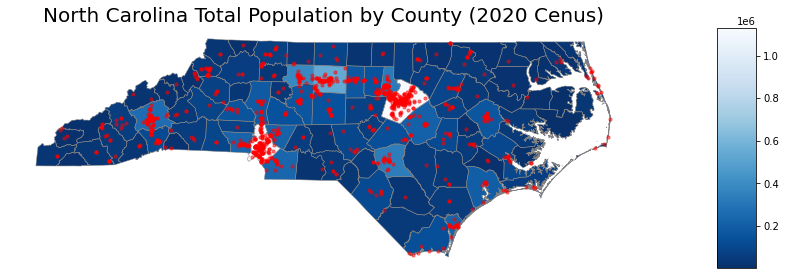

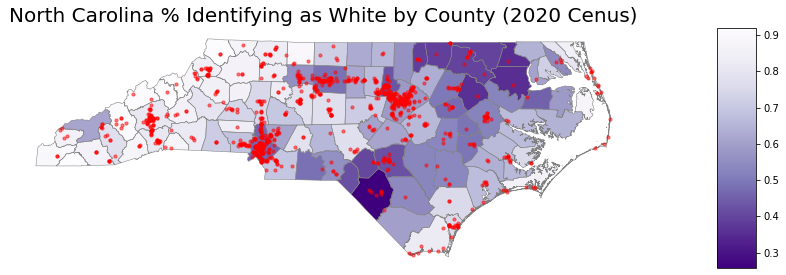

In [134]:
#NORTH CAROLINA : TOTAL POPULATION

fig, ax = plt.subplots(figsize=(12,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
NC_county_map.plot(ax=ax, 
                        column='U7B001', 
                        cmap='Blues_r',
                        legend=True, 
                        cax=cax,
                        missing_kwds={"color": "lightgrey"},
                       )
NC_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)
EV_charger_points.plot(ax=ax, color = 'red', alpha=0.5, markersize = 10 )

ax.set_title('North Carolina Total Population by County (2020 Cenus)', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()


#NORTH CAROLINA : WHITE POPULATION PROPORTION

fig, ax = plt.subplots(figsize=(12,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
NC_county_map.plot(ax=ax, 
                        column='white_rate', 
                        cmap='Purples_r',
                        legend=True, 
                        cax=cax,
                        missing_kwds={"color": "lightgrey"},
                       )
NC_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)
EV_charger_points.plot(ax=ax, color = 'red', alpha=0.5, markersize = 10 )

ax.set_title('North Carolina % Identifying as White by County (2020 Cenus)', fontsize=20)

fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()
